In [1]:
# Step 1 - importing software components

import requests
import pandas as pd 
import io

In [2]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.CHF.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '2000-01-01',  # Start date of the time series
    'endPeriod': '2018-10-01'     # End of the time series
}

In [3]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
response = requests.get(request_url, params=parameters)

# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

<Response [200]>
https://data-api.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A?startPeriod=2000-01-01&endPeriod=2018-10-01


In [4]:
# Print the first 1000 characters of the response
print(response.text[0:1000])

<?xml version="1.0" encoding="UTF-8"?><message:GenericData xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xsi:schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd">
<message:Header>
<message:ID>d62f6ba5-16e1-42f9-a213-34d38a066057</message:ID>
<message:Test>false</message:Test>
<message:Prepared>2023-11-09T20:30:14.001Z</message:Prepared>
<message:Sender id="ECB"/>
<message:Structure structureID="ECB_EXR1" dimensi

In [5]:
# Make the HTTP request again, now requesting for CSV format
response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
print(response)

<Response [200]>


In [6]:
# Print the first 1000 characters to inspect the response
response.text[0:1000]

'KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK,OBS_COM,TIME_FORMAT,BREAKS,COLLECTION,COMPILING_ORG,DISS_ORG,DOM_SER_IDS,PUBL_ECB,PUBL_MU,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-03,1.6043,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-04,1.6053,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-05,1.606,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-06,1.6068,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss fra

In [7]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [8]:
# Check the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   KEY              4859 non-null   object 
 1   FREQ             4859 non-null   object 
 2   CURRENCY         4859 non-null   object 
 3   CURRENCY_DENOM   4859 non-null   object 
 4   EXR_TYPE         4859 non-null   object 
 5   EXR_SUFFIX       4859 non-null   object 
 6   TIME_PERIOD      4859 non-null   object 
 7   OBS_VALUE        4798 non-null   float64
 8   OBS_STATUS       4859 non-null   object 
 9   OBS_CONF         238 non-null    object 
 10  OBS_PRE_BREAK    0 non-null      float64
 11  OBS_COM          0 non-null      float64
 12  TIME_FORMAT      4859 non-null   object 
 13  BREAKS           0 non-null      float64
 14  COLLECTION       4859 non-null   object 
 15  COMPILING_ORG    0 non-null      float64
 16  DISS_ORG         0 non-null      float64
 17  DOM_SER_IDS   

In [9]:
# Show the last 5 entries of the DataFrame
df.tail()

,KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,...,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
4854,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-25,1.1376,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4855,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-26,1.1369,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4856,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-27,1.1371,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4857,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-28,1.1316,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4858,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-10-01,1.1414,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0


In [10]:
# Inspect the prices. Do the mean, minimum and maximum make sense?
df['OBS_VALUE'].describe()

count    4798.000000
mean        1.379459
std         0.193938
min         0.981600
25%         1.205500
50%         1.467300
75%         1.547200
max         1.680300
Name: OBS_VALUE, dtype: float64

In [11]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
ts.tail()

,OBS_VALUE
TIME_PERIOD,
2018-09-25,1.1376
2018-09-26,1.1369
2018-09-27,1.1371
2018-09-28,1.1316
2018-10-01,1.1414


<Axes: xlabel='TIME_PERIOD'>

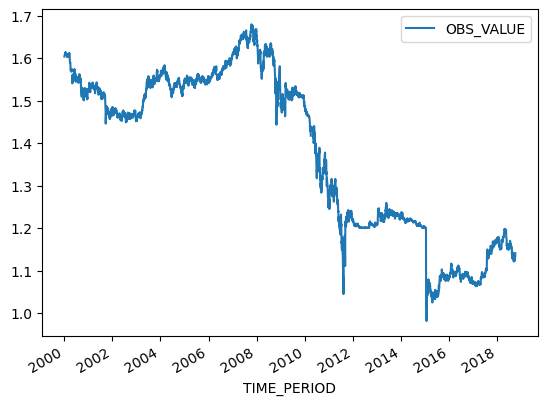

In [12]:
%matplotlib inline
ts.plot()

In [15]:
from pandasdmx import Request

# Define the source
ecb = Request('ECB')

In [16]:
# Retrieve the data (we start at 2016, because are requesting a larger dataset (including other frequencies))
data_response = ecb.data(resource_id = 'EXR', key={'CURRENCY': ['CHF', 'EUR']}, params = {'startPeriod': '2016'})
data = data_response.data

2023-11-09 20:37:17,212 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


In [17]:
# The data will be a pandaSDMC 'DataSet'
type(data)


list

In [21]:
print(data)

[GenericDataSet(annotations=[], action=None, attrib={}, valid_from=None, described_by=None, structured_by=<DataStructureDefinition ECB:ECB_EXR1(1.0): Exchange Rates>, obs=[Observation(attached_attribute={'OBS_STATUS': <AttributeValue: OBS_STATUS=A>, 'OBS_CONF': <AttributeValue: OBS_CONF=F>}, series_key=<SeriesKey: FREQ=A, CURRENCY=CHF, CURRENCY_DENOM=EUR, EXR_TYPE=SP00, EXR_SUFFIX=A>, dimension=<Key: TIME_PERIOD=2016>, value='1.0901552529183', value_for=None, group_keys=set()), Observation(attached_attribute={'OBS_STATUS': <AttributeValue: OBS_STATUS=A>, 'OBS_CONF': <AttributeValue: OBS_CONF=F>}, series_key=<SeriesKey: FREQ=A, CURRENCY=CHF, CURRENCY_DENOM=EUR, EXR_TYPE=SP00, EXR_SUFFIX=A>, dimension=<Key: TIME_PERIOD=2017>, value='1.1116741176471', value_for=None, group_keys=set()), Observation(attached_attribute={'OBS_STATUS': <AttributeValue: OBS_STATUS=A>, 'OBS_CONF': <AttributeValue: OBS_CONF=F>}, series_key=<SeriesKey: FREQ=A, CURRENCY=CHF, CURRENCY_DENOM=EUR, EXR_TYPE=SP00, EXR_S